In [4]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import LabelEncoder

In [35]:
def plot_history(history, filename=""):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,10))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss, color="green", label='Training loss')
    ax1.plot(epochs, val_loss, color = "blue", label='Validation loss')
    ax1.legend()

    ax2.plot(epochs, acc, color="green", label='Training acc')
    ax2.plot(epochs, val_acc, color = "blue", label='Validation acc')
    ax2.legend()

    plt.show()

    if (filename != ""):
        plt.savefig(filename)

def print_history(history):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    print("T loss: {}; V loss: {}; T accuracy: {}; V accuracy: {}"
          .format(loss[-1], val_loss[-1], acc[-1], val_acc[-1]))
    plot_history(history)

def print_history_mae(history, filename=""):
    mae = history['mae']
    val_mae = history['val_mae']
    epochs = range(1, len(mae) + 1)
    print("T mae: {}; V mae: {};".format(mae[-1], val_mae[-1]))
    plt.plot(epochs, mae, color='green', label='Training mae')
    plt.plot(epochs, val_mae, color='blue', label='Validation mae')
    plt.title('Mean absolute error')
    plt.legend()
    plt.show()

    if (filename != ""):
        plt.savefig(filename)

def print_average(mae_arr, val_mae_arr):
    avg_mae = np.average(mae_arr, axis=0)
    avg_val_mae = np.average(val_mae_arr, axis=0)
    epochs = range(1, len(avg_mae) + 1)
    plt.plot(epochs, avg_mae, color='green', label='Training mae')
    plt.plot(epochs, avg_val_mae, color='blue', label='Validation mae')
    plt.title('Average mae')
    plt.legend()
    plt.show()

In [25]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [26]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
# print(train_data.shape)
# print(test_data.shape)
# print(test_targets)

# Normalization
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [34]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
mae_arr = []
val_mae_arr = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    p_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    p_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(p_train_data, p_train_targets, epochs=num_epochs, batch_size=1, verbose=False, validation_data=(val_data, val_targets))
#     print_history_mae(history.history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_arr.append(history.history['mae'])
    val_mae_arr.append(history.history['val_mae'])

print(np.mean(all_scores))
print_average(mae_arr, val_mae_arr)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4669633507728577


NameError: name 'print_average' is not defined

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.372316002845764


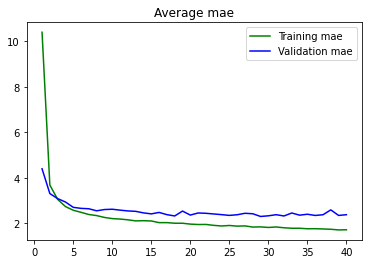

In [37]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 40
all_scores = []
mae_arr = []
val_mae_arr = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    p_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    p_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(p_train_data, p_train_targets, epochs=num_epochs, batch_size=1, verbose=False, validation_data=(val_data, val_targets))
#     print_history_mae(history.history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_arr.append(history.history['mae'])
    val_mae_arr.append(history.history['val_mae'])

print(np.mean(all_scores))
print_average(mae_arr, val_mae_arr)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
2.3776084582010903


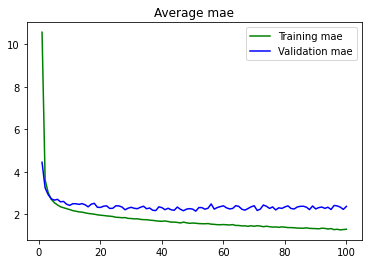

In [38]:
k = 6
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
mae_arr = []
val_mae_arr = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    p_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    p_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(p_train_data, p_train_targets, epochs=num_epochs, batch_size=1, verbose=False, validation_data=(val_data, val_targets))
#     print_history_mae(history.history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_arr.append(history.history['mae'])
    val_mae_arr.append(history.history['val_mae'])

print(np.mean(all_scores))
print_average(mae_arr, val_mae_arr)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
2.4007626324892044


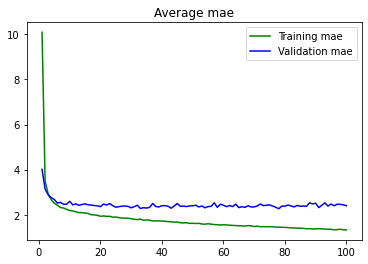

In [39]:
k = 8
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
mae_arr = []
val_mae_arr = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    p_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    p_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(p_train_data, p_train_targets, epochs=num_epochs, batch_size=1, verbose=False, validation_data=(val_data, val_targets))
#     print_history_mae(history.history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_arr.append(history.history['mae'])
    val_mae_arr.append(history.history['val_mae'])

print(np.mean(all_scores))
print_average(mae_arr, val_mae_arr)

processing fold # 0
processing fold # 1
processing fold # 2
2.4133402903874717


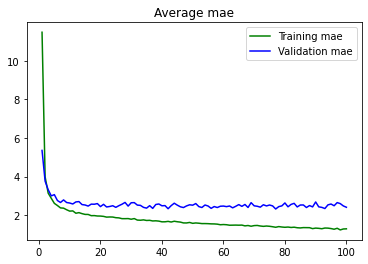

In [40]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
mae_arr = []
val_mae_arr = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    p_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    p_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(p_train_data, p_train_targets, epochs=num_epochs, batch_size=1, verbose=False, validation_data=(val_data, val_targets))
#     print_history_mae(history.history)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_arr.append(history.history['mae'])
    val_mae_arr.append(history.history['val_mae'])

print(np.mean(all_scores))
print_average(mae_arr, val_mae_arr)